In [222]:
import pandas as pd
import numpy as np
import sys, os, re
import matplotlib.pyplot as plt

# from importlib import reload

if re.match(r'^(\w\:\\)|(/)', os.getcwd()):
    # sys.path.insert(0, "c:/Users/dmitr/devs/quantl/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube/")
    sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/src/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/tests/")
    sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/")
    print('installed')


# just some handy helpers from old Qube
# from ta_helpers import kama, kama_indicator, apply_to_frame
import tests.qube.ta.utils_for_testing as test

%load_ext cython

T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100_000)
ds = 100 + (1*np.random.randn(len(T))).cumsum()
data = list(zip(T, ds))

installed
The cython extension is already loaded. To reload it, use:
  %reload_ext cython


## Cython v2 tests (cseries1)

In [341]:
%load_ext autoreload
%autoreload 2

from qube.utils import reload_pyx_module

reload_pyx_module('../../src/qube/core/')
from qube.core.series import TimeSeries
del sys.modules['qube.core.series']
from qube.core.series import (TimeSeries, sma, ema, tema, dema, kama, recognize_time, OHLCV, RollingSum, lag, compare, highest, lowest)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 > Reloaded ../../src/qube/core\series.pyx


## Series example

In [79]:
# %%timeit
ts = TimeSeries('test', '10Min')
ts.update(recognize_time('2024-01-01 00:00'), 1)
ts.update(recognize_time('2024-01-01 00:01'), 5)
ts.update(recognize_time('2024-01-01 00:06'), 2)
ts.update(recognize_time('2024-01-01 00:12'), 3)
ts.update(recognize_time('2024-01-01 00:21'), 4)
ts.update(recognize_time('2024-01-01 00:22'), 5)
ts.update(recognize_time('2024-01-01 00:31'), 6)
ts.update(recognize_time('2024-01-01 00:33'), 7)
ts.update(recognize_time('2024-01-01 00:45'), -12)
ts.update(recognize_time('2024-01-01 00:55'), 12)
ts.update(recognize_time('2024-01-01 01:00'), 12)

1

In [80]:
ts.to_series()

2024-01-01 00:00:00     2.0
2024-01-01 00:10:00     3.0
2024-01-01 00:20:00     5.0
2024-01-01 00:30:00     7.0
2024-01-01 00:40:00   -12.0
2024-01-01 00:50:00    12.0
2024-01-01 01:00:00    12.0
Name: test, dtype: float64

## <font color='orange'>WIP</font>

### Indicators tests

In [151]:
# %%timeit 
ts = TimeSeries('close', '1h')
s1 = sma(ts, 50)
e1 = ema(ts, 50)
ss1 = sma(s1, 50)
ee1 = ema(e1, 50)
t1 = tema(ts, 50)
k1 = kama(ts, 50)
d1 = dema(ts, 50)
test.push(ts, data)

In [152]:
k1s = k1.to_series().dropna()
ik1 = test.apply_to_frame(test.kama, ts.to_series(), 50).dropna()
sum(ik1 - k1.to_series().dropna()) < 1e-8

True

In [113]:
k1 = kama(ts, 50)
k1s = k1.to_series().dropna()
sum(ik1 - k1.to_series().dropna()) < 1e-8

True

In [ ]:
plt.plot(ts.to_series(), lw=0.5)
plt.plot(tema(ts, 50).to_series())
plt.plot(dema(ts, 50).to_series())
plt.plot(t1.to_series())

In [115]:
# %%timeit
x0 = ts.to_series()
pe1 = x0.ewm(span=50, min_periods=50).mean()
pee1 = pe1.ewm(span=50, min_periods=50).mean()
ps1 = x0.rolling(50).mean()
pss1 = ps1.rolling(50).mean()

In [ ]:
plt.plot(x0, lw=0.5)
plt.plot(s1.to_series()); plt.plot(ps1)
plt.plot(ss1.to_series()); plt.plot(pss1)
plt.plot(e1.to_series()); plt.plot(pe1)
plt.plot(ee1.to_series()); plt.plot(pee1)
# plt.plot(s1.to_series()-ps1)

In [116]:
# %%timeit
s1 = sma(ts, 50)
e1 = ema(ts, 50)
ss1 = sma(s1, 50)
ee1 = ema(e1, 50)
k1 = kama(e1, 50)

In [117]:
ts.get_indicators()

{'sma(50)': <qube.core.series.Sma at 0x23b70af9430>,
 'ema(50,init_mean=True)': <qube.core.series.Ema at 0x23b6c65e790>,
 'tema(50,init_mean=True)': <qube.core.series.Tema at 0x23b6be71ca0>,
 'kama(50,2,30)': <qube.core.series.Kama at 0x23b6c4581f0>,
 'dema(50,init_mean=True)': <qube.core.series.Dema at 0x23b6c92a4c0>}

In [ ]:
plt.plot(k1.to_series())

### Indicators wip ... 

In [271]:
ts0 = TimeSeries('close', '1Min')
# em0 = sma(ts0, 3)
# em1 = sma(em0, 3)
k0 = kama(ts0, 6)  
l1 = lag(ts0, 1)
l2 = lag(l1, 1)

for t, v in [
    ('2024-01-01 00:00', 9), ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2), ('2024-01-01 00:01', 3),   ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5), ('2024-01-01 00:04', 5.1), ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6), ('2024-01-01 00:05', 7),   ('2024-01-01 00:05', 6),
    ('2024-01-01 00:07', 8), ('2024-01-01 00:07', -1),  ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12),
    ('2024-01-01 00:11', 13),
    ('2024-01-01 00:12', 14),
    ('2024-01-01 00:13', 15),
    ('2024-01-01 00:14', 17),
    ('2024-01-01 00:15', 4),
]:
    ts0.update(recognize_time(t), v)
    # print(l3[0])

In [274]:
test.scols(ts0, l1, l2)

,close,lag(1),lag(1)
2024-01-01 00:00:00,1.0,NaN,NaN
2024-01-01 00:01:00,2.0,1.0,NaN
2024-01-01 00:02:00,3.0,2.0,1.0
2024-01-01 00:03:00,4.0,3.0,2.0
2024-01-01 00:04:00,5.0,4.0,3.0
2024-01-01 00:05:00,6.0,5.0,4.0
2024-01-01 00:07:00,8.0,6.0,5.0
2024-01-01 00:08:00,8.0,8.0,6.0
2024-01-01 00:09:00,8.0,8.0,8.0
2024-01-01 00:10:00,12.0,8.0,8.0


In [276]:
lag(ts0, 2).to_series() == l2.to_series()

2024-01-01 00:00:00    False
2024-01-01 00:01:00    False
2024-01-01 00:02:00     True
2024-01-01 00:03:00     True
2024-01-01 00:04:00     True
2024-01-01 00:05:00     True
2024-01-01 00:07:00     True
2024-01-01 00:08:00     True
2024-01-01 00:09:00     True
2024-01-01 00:10:00     True
2024-01-01 00:11:00     True
2024-01-01 00:12:00     True
2024-01-01 00:13:00     True
2024-01-01 00:14:00     True
2024-01-01 00:15:00     True
dtype: bool

In [ ]:
ts0.get_indicators()

In [252]:
ll2 = lag(lag(ts0, 1),1)

### Caching indicators

In [342]:
def rsi(ts: TimeSeries, period: int):
	ds = ts - ts.shift(1)
	mu = sma(ds * (ds > 0), period)
	md = -sma(ds * (ds < 0), period)
	denom = mu + md
	return mu / denom
	# return mu / (mu + md)

ts = TimeSeries('close', '1h')
r1 = rsi(ts, 14)
test.push(ts, data[:2000]);

In [343]:
test.push(ts, data[2000:3000]);

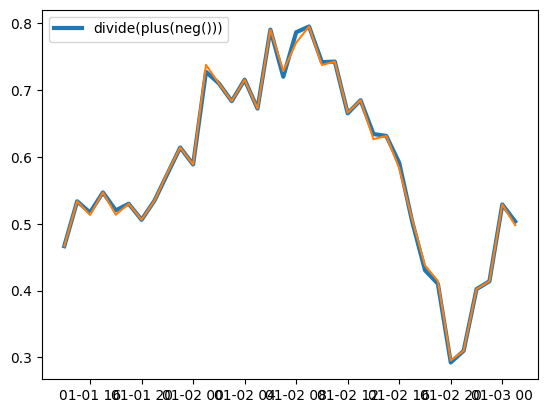

In [344]:
r1 = rsi(ts, 14)
r1.plot(lw=3)
# plt.plot(test.rsi(ts.pd(), 14))
ds = ts.pd().diff()
mu = test.apply_to_frame(test.sma, ds * (ds > 0), 14)
md = test.apply_to_frame(test.sma, ds * (ds < 0), 14)
plt.plot(mu/(mu - md))
# plt.plot((mu - md))
# plt.plot(mu)

In [8]:
# %%timeit
r1 = rsi(ts, 14)

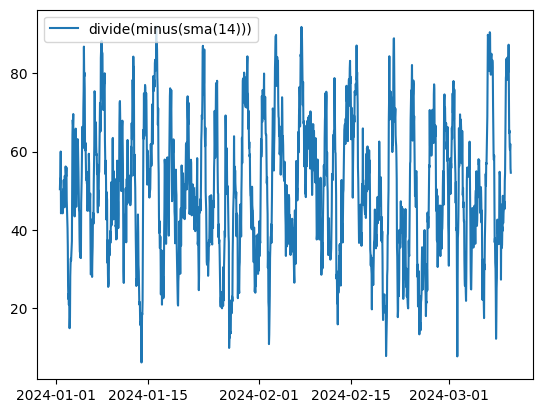

In [9]:
r1.plot()

In [336]:
if 1:
    x = ts.pd()
    xx = pd.concat((x, x.shift(1)), axis=1, keys=['c', 'p'])
    df = (xx.c - xx.p)
    mu2 = test.smooth(df.where(df > 0, 0), test.sma, 14)
    md2 = test.smooth(abs(df.where(df < 0, 0)), test.sma, 14)
    r2 = 100 * mu2 / (mu2 + md2)

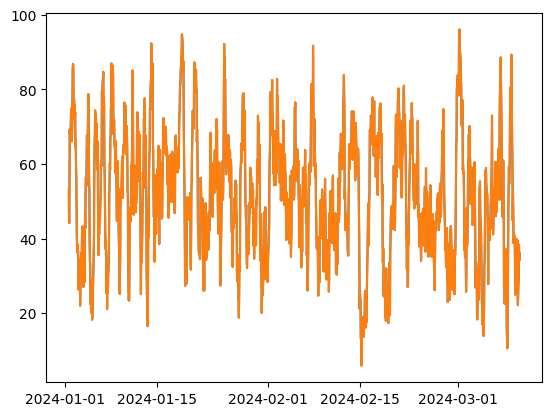

In [341]:
plt.plot(r1.pd())
plt.plot(r2)

In [ ]:
mu

In [ ]:
# plt.plot(100*mu.pd() / (mu.pd() + md.pd()))
r1.plot()
plt.plot(test.rsi(ts.pd(), p))

In [206]:
def stoch(series, period):
    return ((highest(series, period) - lowest(series, period)) / highest(series, period))

In [ ]:
# (ts * ((ts - ts.shift(1)) > 0)).plot()
(ts * ((ts - ts.shift(1)) < 0))#.plot()

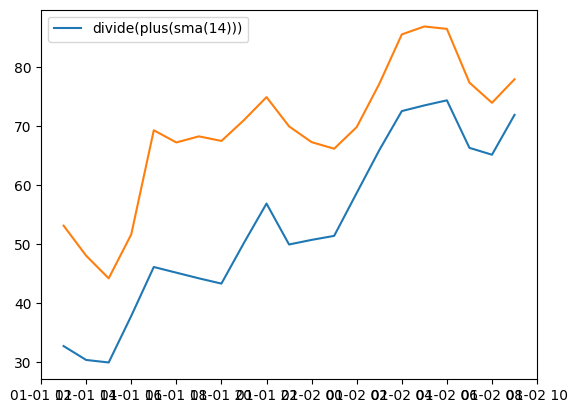

In [288]:
p = 14
rs = sma(ts * ((ts - ts.shift(1)) > 0), p)
ds = sma(ts * ((ts - ts.shift(1)) < 0), p) 
r1 = ((rs * 100) / (rs + ds))
r1.plot()
plt.plot(test.rsi(ts.pd(), p))

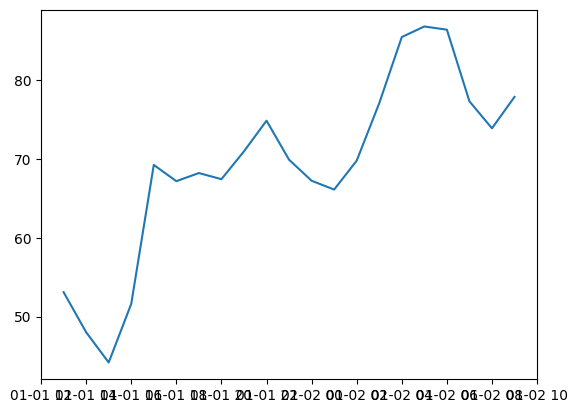

In [289]:
plt.plot(test.rsi(ts.pd(), 14))

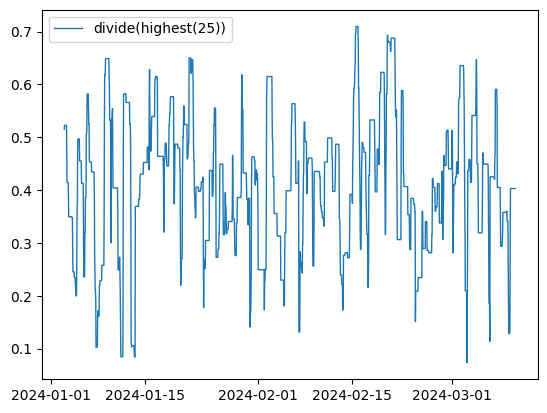

In [219]:
stoch(stoch(ts, 25), 25).plot(lw=1)
# stoch(ts, 30).plot()
# (highest(ts, 50)).plot()
# (ts).plot()

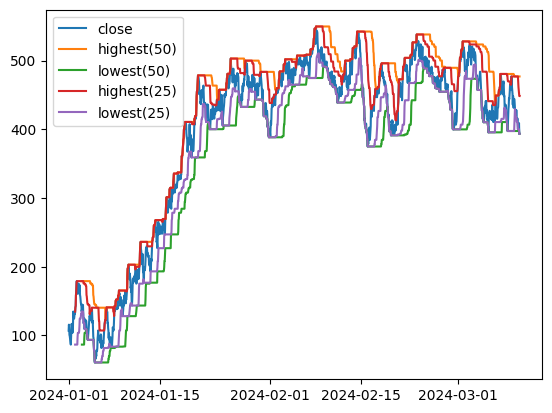

In [221]:
ts.plot(with_indicators=1)

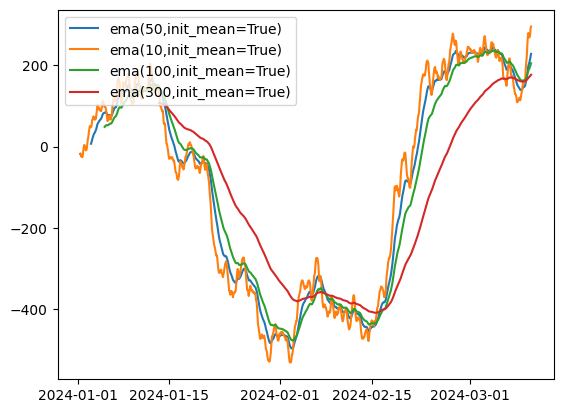

In [82]:
for k, vi in ts.get_indicators().items():
    plt.plot(vi.pd(), label=k)
plt.legend(loc=2)

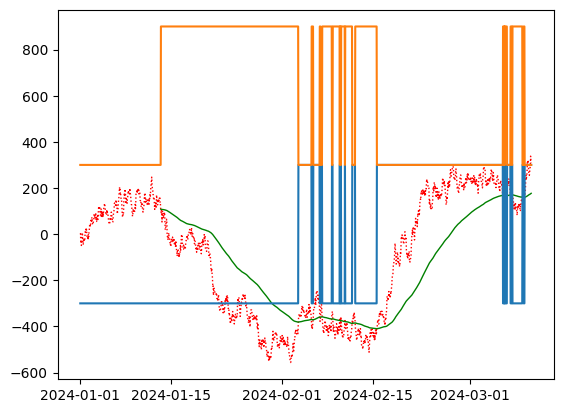

In [76]:
ts.plot(ls=':', lw=1, c='r')
# (ema(ema(ts, 50), 10)).plot(lw=1, c='g')
(ema(ts, 300)).plot(lw=1, c='g')

(((ts > ema(ts, 300))*2 - 1)*300).plot()
(((ts < ema(ts, 300))*2 + 1)*300).plot()

2024-01-01 00:00:00    0.0
2024-01-01 01:00:00    0.0
2024-01-01 02:00:00    0.0
2024-01-01 03:00:00    0.0
2024-01-01 04:00:00    0.0
                      ... 
2024-03-10 06:00:00    1.0
2024-03-10 07:00:00    1.0
2024-03-10 08:00:00    1.0
2024-03-10 09:00:00    1.0
2024-03-10 10:00:00    1.0
Name: lessthan(close), Length: 1667, dtype: float64

In [ ]:
plt.plot(ts.pd())

In [233]:
x = sma(ts, 15) / 10000

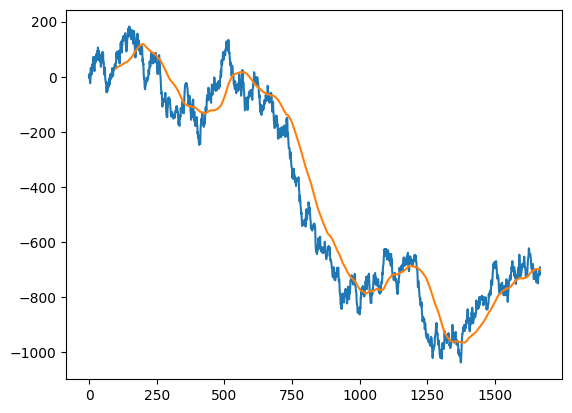

In [273]:
plt.plot(ts[::-1])
plt.plot(sma(ts, 100)[::-1])

In [256]:
test.scols(ts.pd(), sma(ts, 100).pd())

,close,sma(100)
2024-01-01 00:00:00,9.547423,NaN
2024-01-01 00:05:00,6.196747,NaN
2024-01-01 00:10:00,4.965852,NaN
2024-01-01 00:15:00,7.308524,NaN
2024-01-01 00:20:00,6.591538,NaN
...,...,...
2024-03-10 10:15:00,-707.613430,-724.800415
2024-03-10 10:20:00,-709.290582,-724.533429
2024-03-10 10:25:00,-701.952448,-724.119552
2024-03-10 10:30:00,-698.142646,-723.615258


In [ ]:
c = 1
((ts + sma(ts, 10))/c).pd()

In [167]:
ts.get_indicators()

{'sma(15)': <qube.core.series.Sma at 0x188073a03c0>,
 'sma(10)': <qube.core.series.Sma at 0x188073a0970>,
 'plus(divide(2))': <qube.core.series.Plus at 0x188031e2ac0>,
 'plus(divide(21))': <qube.core.series.Plus at 0x188031e2c40>,
 'plus(divide(-1000))': <qube.core.series.Plus at 0x188031e2dc0>,
 'plus(divide(-1))': <qube.core.series.Plus at 0x188031e2a40>,
 'plus(divide(1))': <qube.core.series.Plus at 0x188031e2440>,
 'plus(sma(10))': <qube.core.series.Plus at 0x1887da0ab40>}

In [109]:
ts.pd()

2024-01-01 00:00:00     -2.607196
2024-01-01 01:00:00     -5.109464
2024-01-01 02:00:00     10.511551
2024-01-01 03:00:00     -7.930545
2024-01-01 04:00:00    -23.576204
                          ...    
2024-03-10 06:00:00   -703.797913
2024-03-10 07:00:00   -720.468246
2024-03-10 08:00:00   -712.936513
2024-03-10 09:00:00   -719.258723
2024-03-10 10:00:00   -692.007145
Name: close, Length: 1667, dtype: float64

In [309]:
ema(ts, 10).to_series()
ema(ts, 50).to_series()
tema(ts, 50).to_series()
dema(ts, 50).to_series()

2024-01-01 00:00:00           NaN
2024-01-01 01:00:00           NaN
2024-01-01 02:00:00           NaN
2024-01-01 03:00:00           NaN
2024-01-01 04:00:00           NaN
                          ...    
2024-03-10 06:00:00    630.626537
2024-03-10 07:00:00    633.594281
2024-03-10 08:00:00    636.005011
2024-03-10 09:00:00    638.245717
2024-03-10 10:00:00    640.161844
Name: dema(50,init_mean=True), Length: 1667, dtype: float64

In [310]:
ts.get_indicators()

{'sma(10,)': <qube.core.series.Sma at 0x1e30d2dbf20>,
 'ema(10,init_mean=True)': <qube.core.series.Ema at 0x1e30ca170d0>,
 'ema(50,init_mean=True)': <qube.core.series.Ema at 0x1e30d29f700>,
 'tema(50,init_mean=True)': <qube.core.series.Tema at 0x1e30d29f790>,
 'dema(50,init_mean=True)': <qube.core.series.Dema at 0x1e30cb502c0>}

### OHLC tests

In [367]:
ohlc = OHLCV('1Min')
s1 = sma(ohlc.close, 10)
for t, v in [
    ('2024-01-01 00:00', 9), ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2), ('2024-01-01 00:01', 3),   ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5), ('2024-01-01 00:04', 5.1), ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6), ('2024-01-01 00:05', 7),   ('2024-01-01 00:05', 6),
    ('2024-01-01 00:07', 8), ('2024-01-01 00:07', -1),  ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12), ('2024-01-01 00:10:01', 21),('2024-01-01 00:10:30', 1),('2024-01-01 00:10:31', 5),
    ('2024-01-01 00:11', 13),
    ('2024-01-01 00:12', 14),
    ('2024-01-01 00:13', 15),
    ('2024-01-01 00:14', 17),
    ('2024-01-01 00:15', 4), ('2024-01-01 00:15:10', 12),
]:
    ohlc.update(recognize_time(t), v, 1)

In [369]:
r1 = RollingSum(3)

In [381]:
r1.update(1, 1); print(r1)
# r1.update(1, 1); print(r1)
# r1.update(1, 0); print(r1)

rs[3] = [1. 1. 1.] @ 0 -> 0


In [ ]:
ohlc.to_series()

In [385]:
print(str(ohlc), str(s1))

OHLCV[1Min] | 15 records
  2024-01-01T00:15:00.000000000 {o:4.000000 | h:12.000000 | l:4.000000 | c:12.000000 | v:2.000000}
  2024-01-01T00:14:00.000000000 {o:17.000000 | h:17.000000 | l:17.000000 | c:17.000000 | v:1.000000}
  2024-01-01T00:13:00.000000000 {o:15.000000 | h:15.000000 | l:15.000000 | c:15.000000 | v:1.000000}
   .......... 
  2024-01-01T00:02:00.000000000 {o:3.000000 | h:3.000000 | l:3.000000 | c:3.000000 | v:1.000000}
  2024-01-01T00:01:00.000000000 {o:2.000000 | h:3.000000 | l:2.000000 | c:2.000000 | v:3.000000}
  2024-01-01T00:00:00.000000000 {o:9.000000 | h:9.000000 | l:1.000000 | c:1.000000 | v:2.000000}
 sma(10)[1Min] | 15 records
  2024-01-01T00:15:00.000000000 10.6
  2024-01-01T00:14:00.000000000 9.9
  2024-01-01T00:13:00.000000000 8.6
   .......... 
  2024-01-01T00:02:00.000000000 nan
  2024-01-01T00:01:00.000000000 nan
  2024-01-01T00:00:00.000000000 nan



In [386]:
s1.to_series()

2024-01-01 00:00:00     NaN
2024-01-01 00:01:00     NaN
2024-01-01 00:02:00     NaN
2024-01-01 00:03:00     NaN
2024-01-01 00:04:00     NaN
2024-01-01 00:05:00     NaN
2024-01-01 00:07:00     NaN
2024-01-01 00:08:00     NaN
2024-01-01 00:09:00     NaN
2024-01-01 00:10:00     NaN
2024-01-01 00:11:00     6.2
2024-01-01 00:12:00     7.4
2024-01-01 00:13:00     8.6
2024-01-01 00:14:00     9.9
2024-01-01 00:15:00    10.6
Name: sma(10), dtype: float64

In [388]:
sma(ohlc.close, 10).to_series()

2024-01-01 00:00:00     NaN
2024-01-01 00:01:00     NaN
2024-01-01 00:02:00     NaN
2024-01-01 00:03:00     NaN
2024-01-01 00:04:00     NaN
2024-01-01 00:05:00     NaN
2024-01-01 00:07:00     NaN
2024-01-01 00:08:00     NaN
2024-01-01 00:09:00     NaN
2024-01-01 00:10:00     5.0
2024-01-01 00:11:00     6.2
2024-01-01 00:12:00     7.4
2024-01-01 00:13:00     8.6
2024-01-01 00:14:00     9.9
2024-01-01 00:15:00    10.6
Name: sma(10), dtype: float64

In [389]:
sma(ohlc.close, 8).to_series()

2024-01-01 00:00:00       NaN
2024-01-01 00:01:00       NaN
2024-01-01 00:02:00       NaN
2024-01-01 00:03:00       NaN
2024-01-01 00:04:00       NaN
2024-01-01 00:05:00       NaN
2024-01-01 00:07:00       NaN
2024-01-01 00:08:00     4.625
2024-01-01 00:09:00     5.500
2024-01-01 00:10:00     5.875
2024-01-01 00:11:00     7.125
2024-01-01 00:12:00     8.375
2024-01-01 00:13:00     9.625
2024-01-01 00:14:00    11.000
2024-01-01 00:15:00    11.500
Name: sma(8), dtype: float64

## How to work with indicators in strategy

In [71]:
xs = TimeSeries('close', '1h')
# compare(xs.shift(1), xs)
hh = highest(xs, 13)
ll = lowest(xs, 13)
test.push(xs, data)

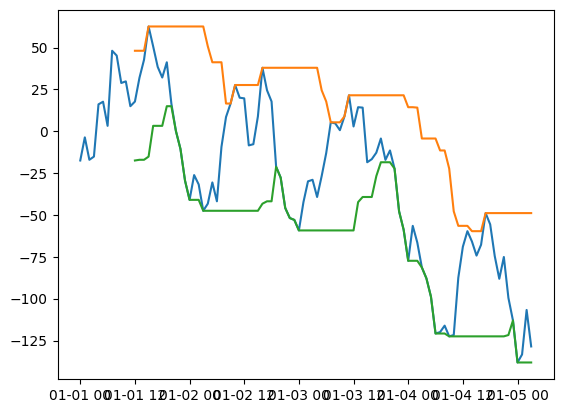

In [57]:
plt.plot(xs.pd()[:100])
plt.plot(highest(xs, 13).pd()[:100])
plt.plot(lowest(xs, 13).pd()[:100])
# plt.plot(hh.pd()[:100])
# plt.plot(xs.pd().rolling(13).max()[:100])

In [75]:
all(abs(highest(xs, 13).pd().dropna() - xs.pd().rolling(13).max().dropna()) <= 1e-4)

True

In [ ]:
test.scols(xs.to_series(), xs.shift(1).to_series(), compare(xs, xs.shift(1)).to_series())

In [ ]:
xs.update(pd.Timestamp('2024-03-10 15:00:01').asm8, 1)
test.scols(xs.pd(), xs.shift(1).pd(), compare(xs, xs.shift(1)).pd())

In [ ]:
xs.shift(1)

In [ ]:
for i in range(len(xs) - 1):
    if (ema(xs, 15)[i] > ema(xs, 50)[i]) and (ema(xs, 15)[i+1] < ema(xs, 50)[i+1]):
        print(pd.Timestamp(xs.times[i]))

In [133]:
xs.get_indicators()

{'lag(1)': <qube.core.series.Lag at 0x21b78bd2190>,
 'compare(lag(1))': <qube.core.series.Compare at 0x21b78bd2c10>,
 'ema(15,init_mean=True)': <qube.core.series.Ema at 0x21b78bf41f0>,
 'ema(50,init_mean=True)': <qube.core.series.Ema at 0x21b78bf4700>}

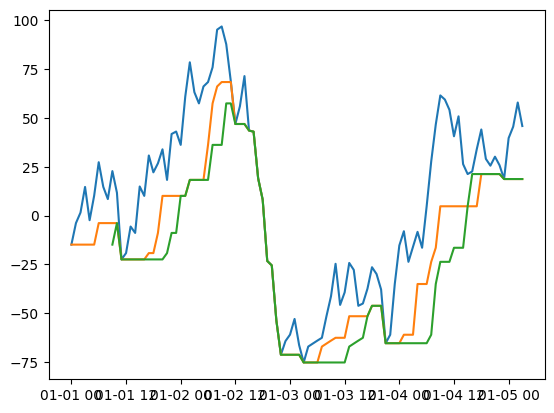

In [295]:
from collections import deque
class SlidingWindowMinMax:
	def __init__(self, period):
		self.maxdeque = deque(maxlen=period-1)
		
	def get_maximum(self):
		return self.maxdeque[0]
	
	def add_tail(self, val):
		while len(self.maxdeque) > 0 and val >= self.maxdeque[-1]:
			self.maxdeque.pop()
		self.maxdeque.append(val)
		# print(f'MAX: {self.get_maximum()} ~ {self.maxdeque}')

	def update(self, val):
		if self.maxdeque[0] < val:
			self.maxdeque[0] = val

In [376]:
def max_sliding_window(a, k):
    queue = deque()
    res, i = [], 0
    for i in range(len(a)):
        while queue and queue[-1][0] <= a[i]:
            queue.pop()
        queue.append((a[i], i+k-1))
        if i >= k-1: res.append(queue[0][0])
        if i == queue[0][1]: queue.popleft()
    return res

In [377]:
max_sliding_window([1,2,1,2,3,4,5,1,1,4], 3)

[2, 2, 3, 4, 5, 5, 5, 4]

In [364]:
def _windowed_max(int_list, k, reversed=False):
    if reversed:
        int_list = int_list.copy()
        int_list.reverse()
    left = []
    cur_max = int_list[0]
    for i, v in enumerate(int_list):
        if i % k == 0:
            cur_max = v
        else:
            cur_max = max(cur_max, v)
        left.append(cur_max)
    if reversed:
        left.reverse()
    return left

def sliding_window_v3(int_list, k):
    left = _windowed_max(int_list, k)
    right = _windowed_max(int_list, k, reversed=True)
    max_list = []
    for i in range(k, len(int_list) + 1):
        max_list.append(max(left[i - 1], right[i - k]))

    return max_list
list001 = [1, 2, 3, 5, 1, 4, 3]

res = sliding_window_v3(list001, 3)
print(res)

[3, 5, 5, 5, 4]


In [ ]:
mq = MinMaxQueue()
mq.enque_element(10)
mq.enque_element(50)
mq.enque_element(10)
mq.enque_element(2)
mq.enque_element(21)
mq.enque_element(21)
mq.enque_element(1)

In [301]:
# def max_sliding_window(a, k):
#     D = deque()
#     res, i = [], 0
#     for i in range(len(a)):
#         while D and D[-1][0] <= a[i]:
#             D.pop()
#         D.append((a[i], i+k-1))
#         if i >= k-1: res.append(D[0][0])
#         if i == D[0][1]: D.popleft()
#     return res

In [ ]:
# pd.Series(max_sliding_window(xs.pd(), 20), index=xs.pd().index)

In [302]:
sw = SlidingWindowMinMax(20)
ms = {}
for t,v in zip(xs.pd().index, xs.pd().values):
    sw.add_tail(v)
    ms[t] = sw.get_maximum()

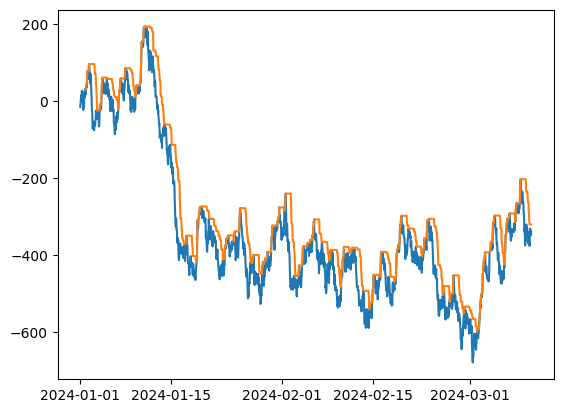

In [304]:

plt.plot(xs.pd())
# plt.plot(pd.Series(ms))

max_sliding_window(xs.pd(), 20)
plt.plot(xs.pd().rolling(20).max())

In [ ]:
sw = SlidingWindowMinMax(3)
sw.add_tail(1)
sw.add_tail(2)
sw.add_tail(3)
sw.add_tail(2)
sw.add_tail(1)
sw.add_tail(1)
# sw.update(5)
# sw.update(6)
# sw.update(1)
sw.add_tail(12)
sw.add_tail(1)
sw.add_tail(3)
sw.add_tail(1)
sw.add_tail(1)

In [157]:
sw.get_maximum()

2